In [5]:
import pandas as pd

# load data
km_woba = pd.read_csv('marte_xwoba_type_19-22.csv')
km_woba = km_woba.melt('pitch_type')  # melt the data to simplify catplot experience
km_woba

,pitch_type,variable,value
0,4-Seamer,xwOBA,0.316
1,Slider,xwOBA,0.283
2,Changeup,xwOBA,0.310
3,Sinker,xwOBA,0.398
4,Curveball,xwOBA,0.291
5,Cutter,xwOBA,0.298
6,Splitter,xwOBA,0.195
7,4-Seamer,vs_div,0.306
8,Slider,vs_div,0.245
9,Changeup,vs_div,0.301


## Perform Ketel Marte baseline xwOBA graphical analysis

/usr/local/lib/python3.10/site-packages/seaborn/axisgrid.py:703: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]
/usr/local/lib/python3.10/site-packages/seaborn/axisgrid.py:703: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]


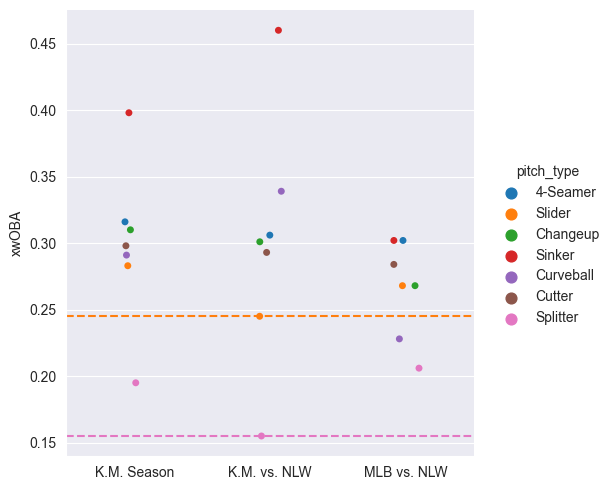

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

g = sns.catplot(x='variable', y='value', hue='pitch_type', data=km_woba)
g.set_axis_labels("", "xwOBA")
g.set_xticklabels(["K.M. Season", "K.M. vs. NLW", "MLB vs. NLW"])

# set a refline at KM's Div xwOBA vs. NLW against fastball; first color
g.refline(y=0.245, color=sns.color_palette()[1])
# set a refline at KM's Div xwOBA vs. NLW against curveball; fifth color
# g.refline(y=0.203, color=sns.color_palette()[4])
# set a refline at KM's Div xwOBA vs. NLW against splitter; seventh color
g.refline(y=0.155, color=sns.color_palette()[6])
plt.show()

## Load training data from the 2021 season and perform Data Understanding and graphical analysis

In [4]:
km = pd.read_csv('marte_vs_nlwest_19_22.csv').rename(columns={'estimated_woba_using_speedangle': 'xwOBA'})
y = pd.DataFrame(km['xwOBA'])
# y.rename(columns={'estimated_woba_using_speedangle': 'xwOBA'}, inplace=True)
y.fillna(0, inplace=True)  # remove NaN values with 0
print(y.describe())

            xwOBA
count  867.000000
mean     0.286809
std      0.355253
min      0.000000
25%      0.005000
50%      0.141000
75%      0.457500
max      1.954000


In [80]:
# release_speed
# Pitch velocities from 2008-16 are via Pitch F/X, and adjusted to roughly out-of-hand release point. All velocities from 2017 and beyond are Statcast, which are reported out-of-hand.
# release_pos_x
# Horizontal Release Position of the ball measured in feet from the catcher's perspective.
# release_pos_z
# Vertical Release Position of the ball measured in feet from the catcher's perspective.
# plate_x
# Horizontal position of the ball when it crosses home plate from the catcher's perspective.
# plate_z
# Vertical position of the ball when it crosses home plate from the catcher's perspective.
# pitcher
# MLB Player Id tied to the play event.
# zone
# Zone location of the ball when it crosses the plate from the catcher's perspective.
# pfx_x
# Horizontal movement in feet from the catcher's perspective.
# pfx_z
# Vertical movement in feet from the catcher's perpsective.
# effective_speed
# Derived speed based on the the extension of the pitcher's release.
# release_spin
# Spin rate of pitch tracked by Statcast.
# spin_axis
# The Spin Axis in the 2D X-Z plane in degrees from 0 to 360, such that 180 represents a pure backspin fastball and 0 degrees represents a pure topspin (12-6) curveball
featureList = ['pitch_type', 'release_speed', 'release_pos_x', 'release_pos_z', 'plate_x', 'plate_z', 'pitcher', 'zone', 'p_throws', 'pfx_x', 'pfx_z', 'effective_speed', 'release_spin_rate', 'pitch_name', 'spin_axis']


X = pd.DataFrame(km21[featureList])
# DataFrame casting appropriate features to category
X.pitcher = X.pitcher.astype('category')
X.zone = X.zone.astype('category')
X.describe()

,release_speed,release_pos_x,release_pos_z,plate_x,plate_z,pfx_x,pfx_z,effective_speed,release_spin_rate,spin_axis
count,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000
mean,89.444019,-0.779139,5.787177,-0.066986,2.377177,-0.067129,0.650574,89.455024,2250.875598,182.889952
std,5.838349,1.983372,0.862056,0.577648,0.774303,0.815280,0.756216,6.009519,369.263240,73.305881
min,70.200000,-4.160000,1.210000,-2.360000,-0.070000,-1.620000,-1.530000,70.500000,1172.000000,4.000000
25%,85.200000,-2.290000,5.570000,-0.450000,1.900000,-0.750000,0.200000,85.100000,2068.000000,133.000000
50%,91.100000,-1.480000,5.920000,-0.050000,2.400000,-0.160000,0.780000,91.300000,2284.000000,203.000000
75%,94.400000,1.550000,6.280000,0.350000,2.910000,0.470000,1.310000,94.300000,2481.000000,223.000000
max,99.000000,3.280000,6.780000,1.210000,4.610000,1.630000,1.830000,99.500000,3152.000000,357.000000


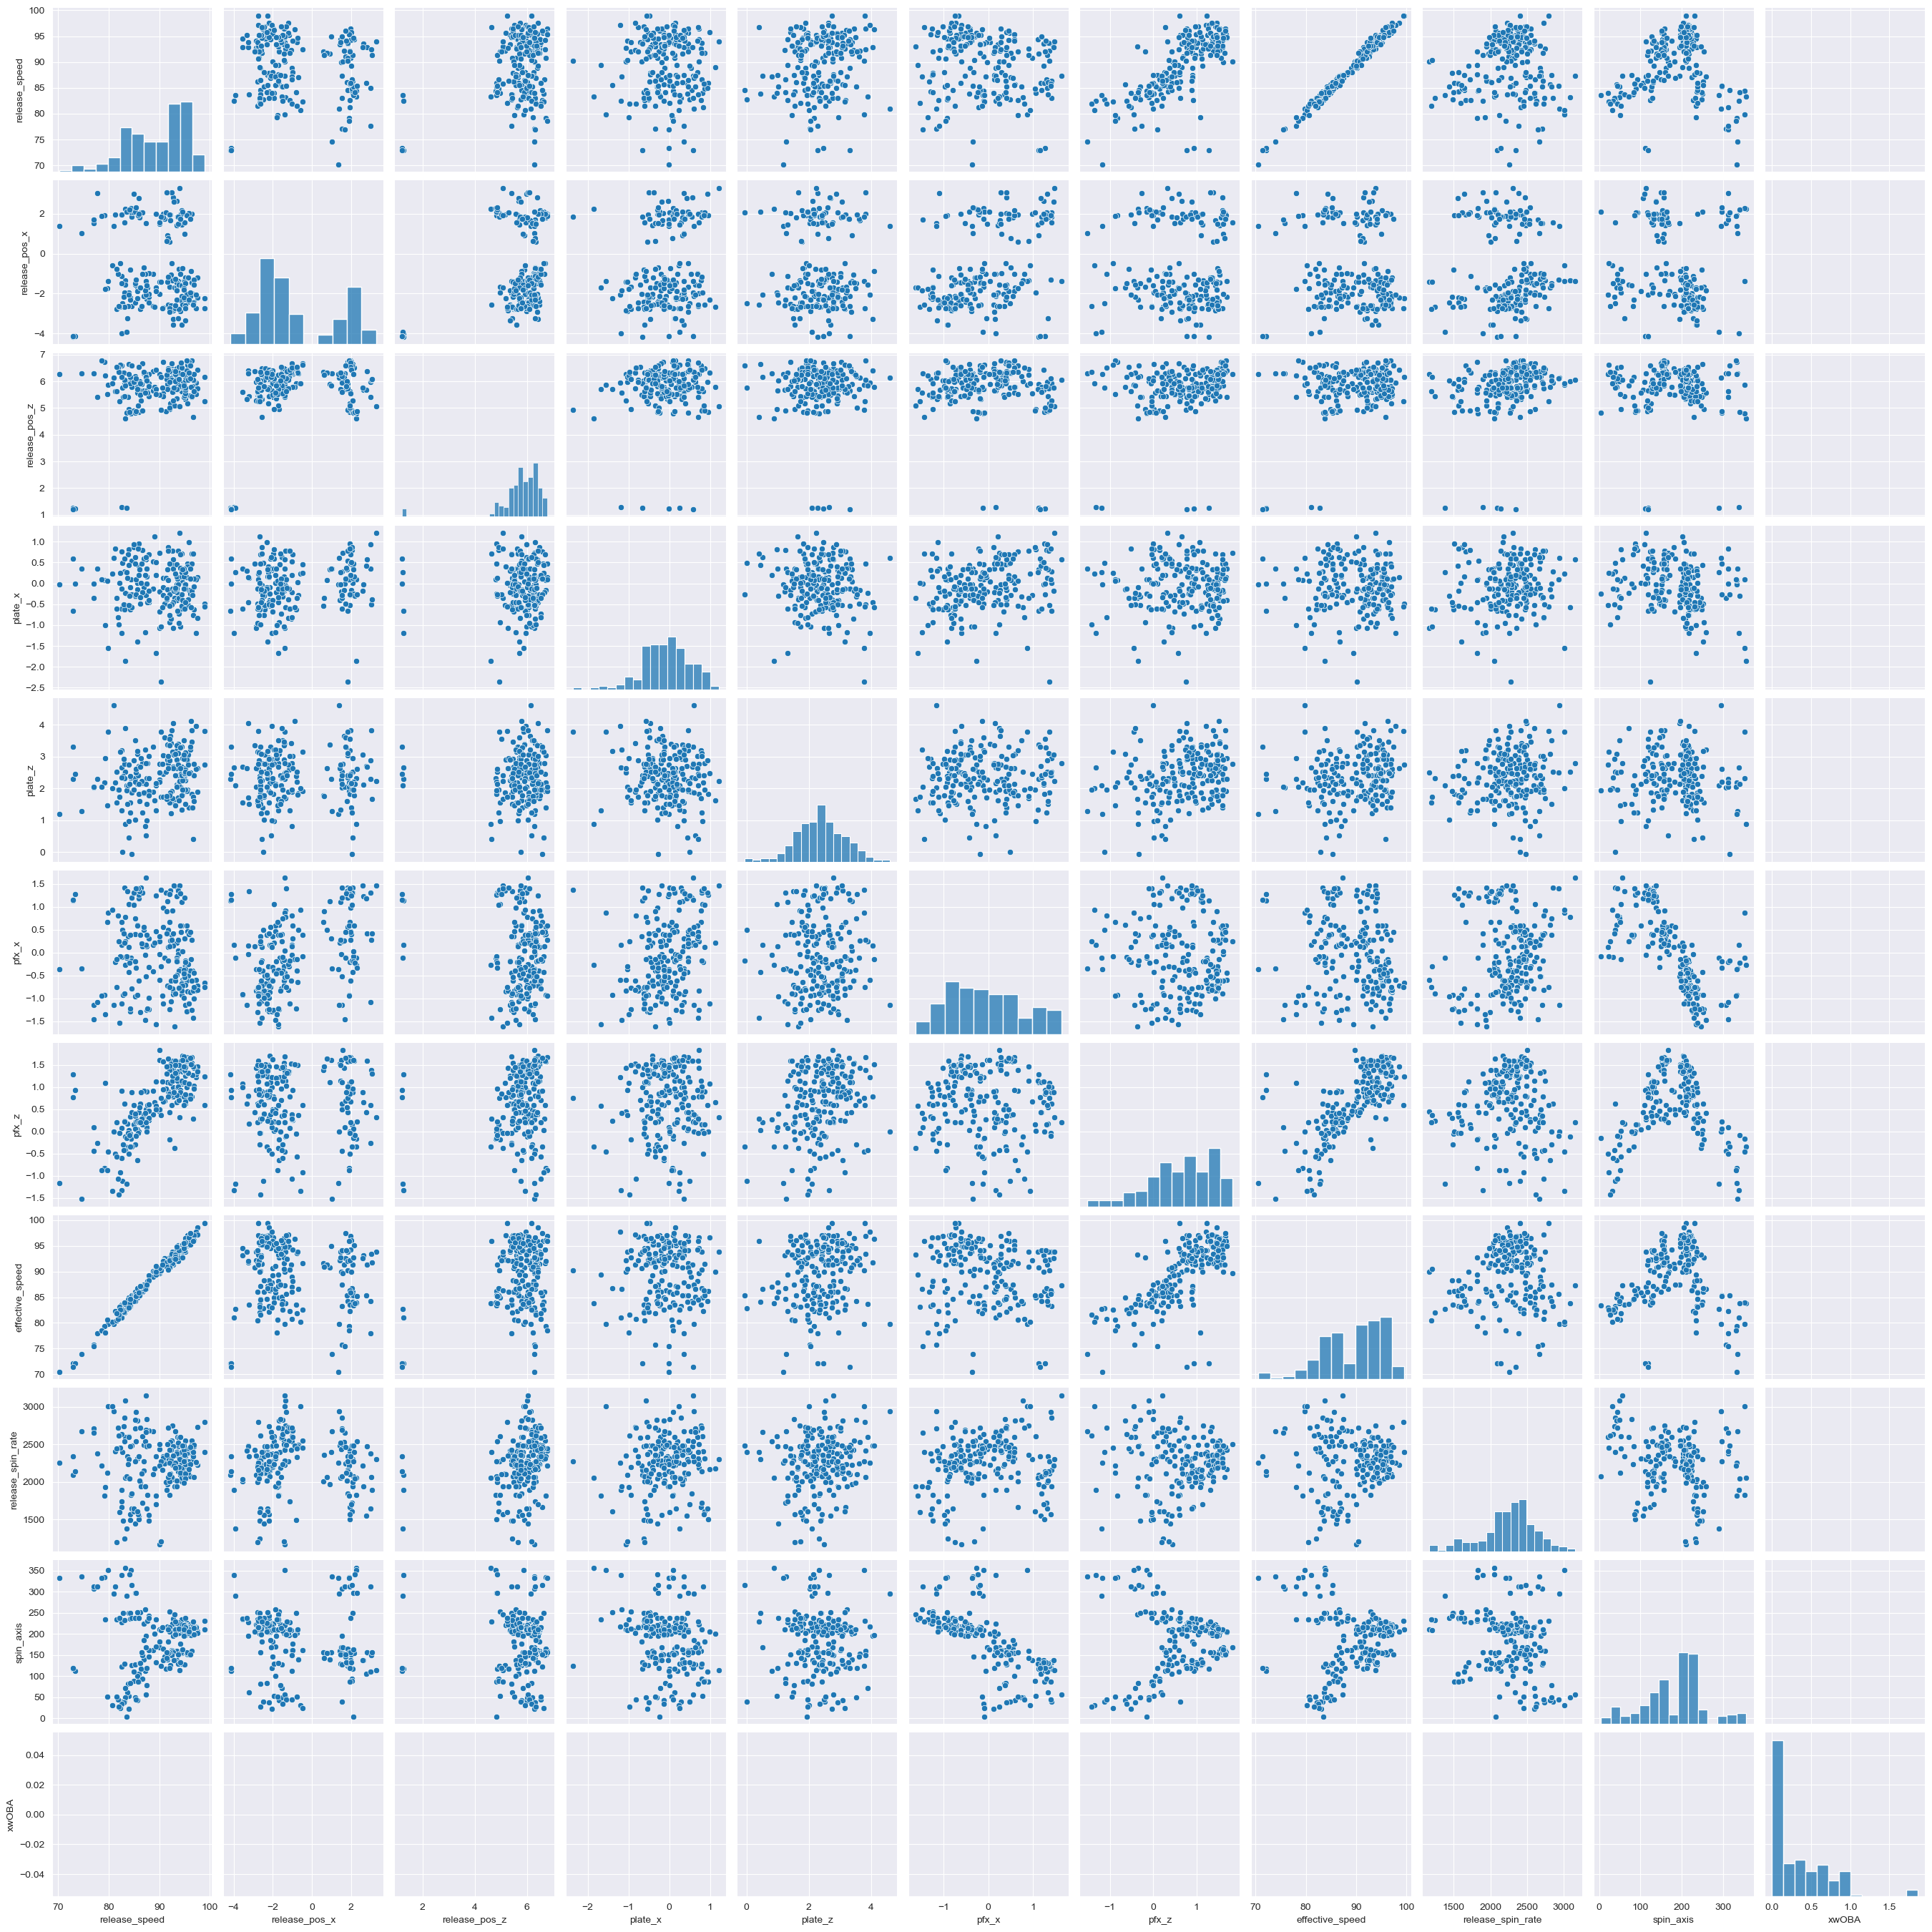

In [81]:
# create pairplot DataFrame
pp = pd.concat([X, y])
sns.pairplot(data=pp)
plt.show()

0      CH
1      SL
2      FF
3      CH
4      FF
       ..
204    FC
205    FF
206    FF
207    FC
208    CU
Name: pitch_type, Length: 209, dtype: object


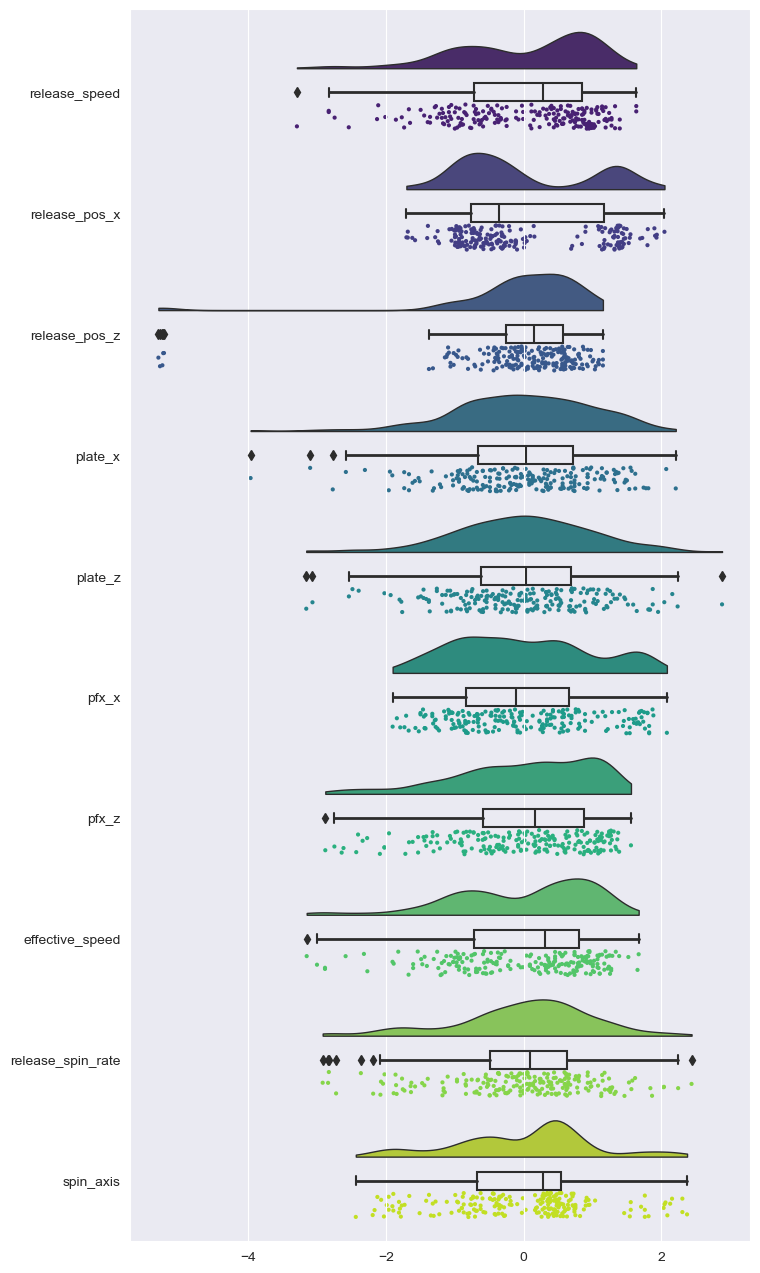

In [109]:
import ptitprince as pt

X_numeric = X.drop(columns=['pitch_type', 'pitcher', 'zone', 'p_throws', 'pitch_name'])

X_numeric = (X_numeric - X_numeric.mean()) / X_numeric.std()

print(X['pitch_type'])
X_numeric.insert(loc=0, column='pitch_type', value=X[['pitch_type']])
# print(X_numeric.head())

f, ax = plt.subplots(figsize=(8,16))
sigma = .25
ax = pt.RainCloud(data = X_numeric.drop(columns=['pitch_type']), palette='viridis', scale="count", bw=sigma, width_viol=0.6, orient="h", move=0.2)
plt.show()

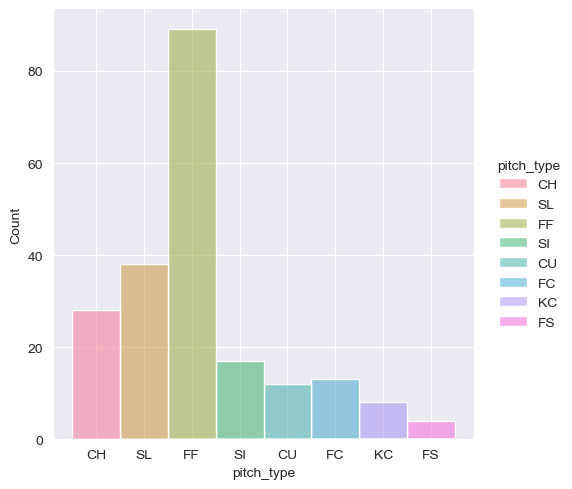

In [159]:
# X_numeric.head()
sns.set_palette('BuPu_r')
sns.displot(X_numeric, x='pitch_type', hue='pitch_type')
plt.show()

In [158]:
import plotly.express as px

fig = px.treemap(km21,
                 path=['pitch_type', 'p_throws', 'type'],
                 color='release_speed'

                 )
fig.show()